In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid", color_codes=True)

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# 결측치 확인

In [4]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


- 결측치의 비율이 높은 항목들은 집값에도 크게 영향을 안미치는 항목들이므로 모두 삭제.
- GarageX 는 GarageCars가 Garage의 특성을 가장 잘 나타내면서 결측치 없이 모두 나타내고 있으므로 나머지는 모두 삭제.
- BsmtX도 마찬가지로 TotalBsmtSF가 결측치 없이 가장 잘 나타내고 있으므로 나머지는 삭제.
- Electrical은 한개의 결측치이므로 결측치가 있는 한 개의 데이터만 삭제.

In [5]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

# numeric data histogram 으로 plot 해보기

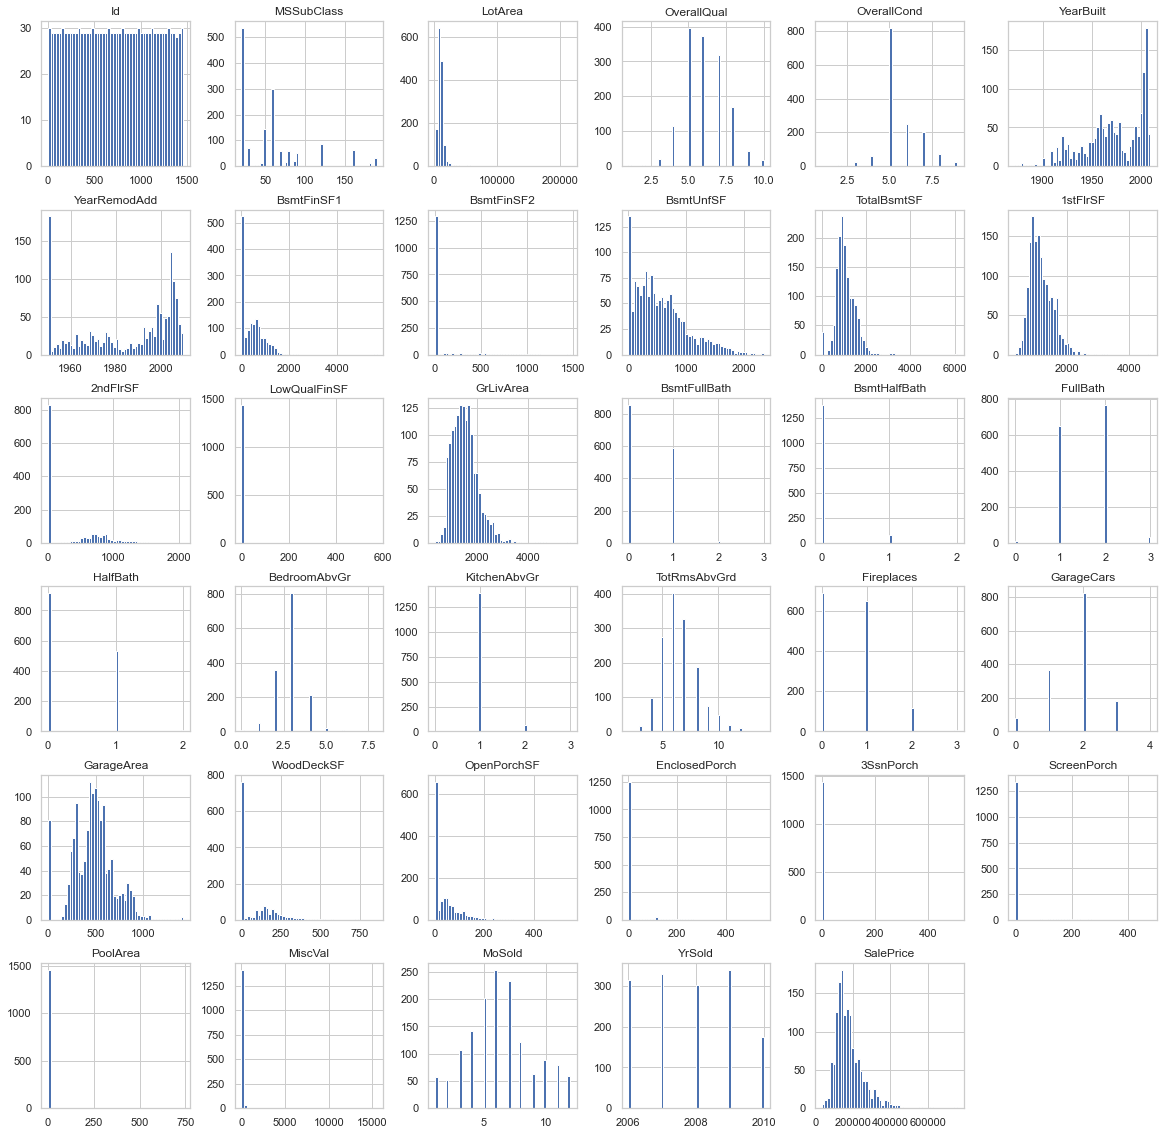

In [6]:
df_train.hist(bins=50, figsize=(20,20))
plt.show()

# SalePrice 데이터 살펴보기

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

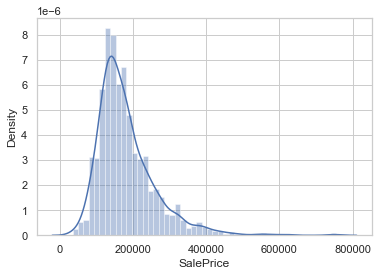

In [7]:
sns.distplot(df_train['SalePrice'])

# SalePrice 와의 상관관계 확인해보기

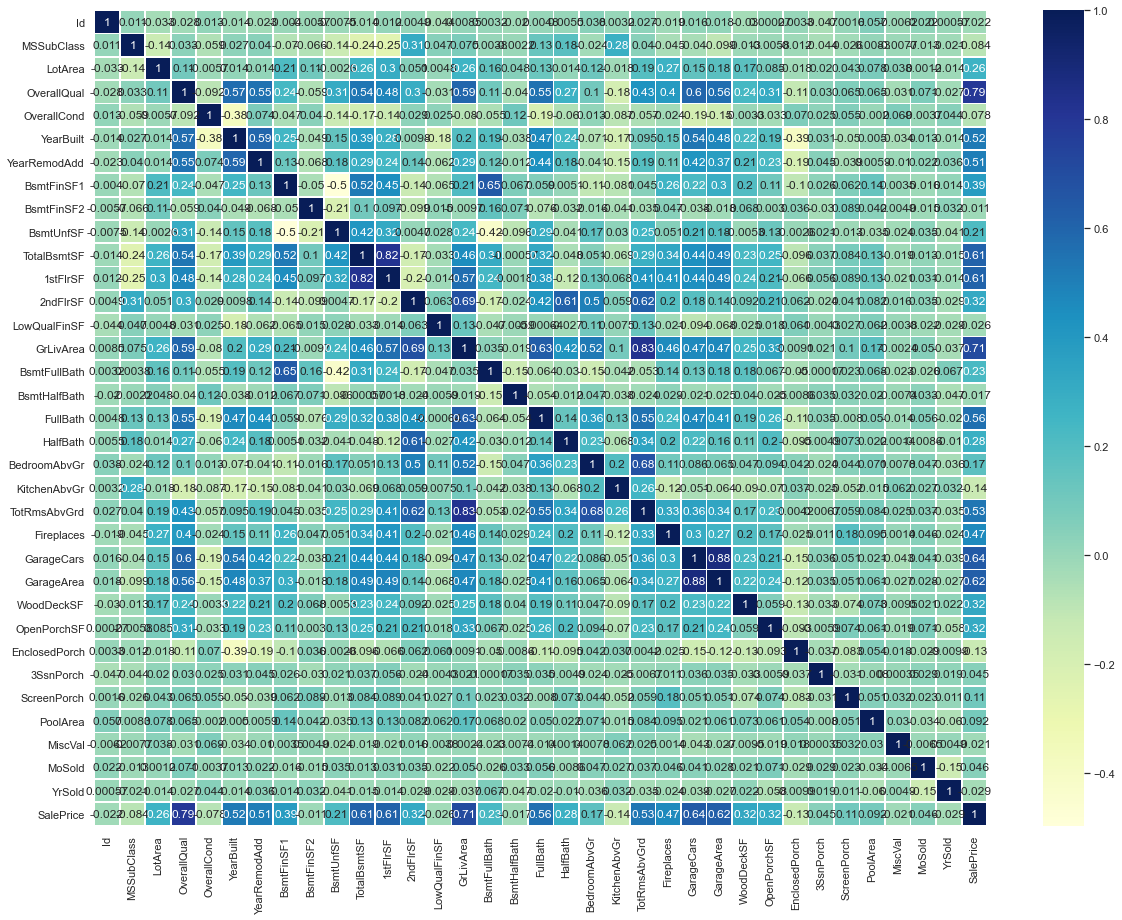

In [8]:
corr = df_train.corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

## SalePrice 와 상관관계 0.4 이상인 column 가져오기

In [9]:
corr_cols = list(df_train.corr()["SalePrice"][abs(df_train.corr()["SalePrice"]) > 0.4].index)
corr_cols.remove("SalePrice")

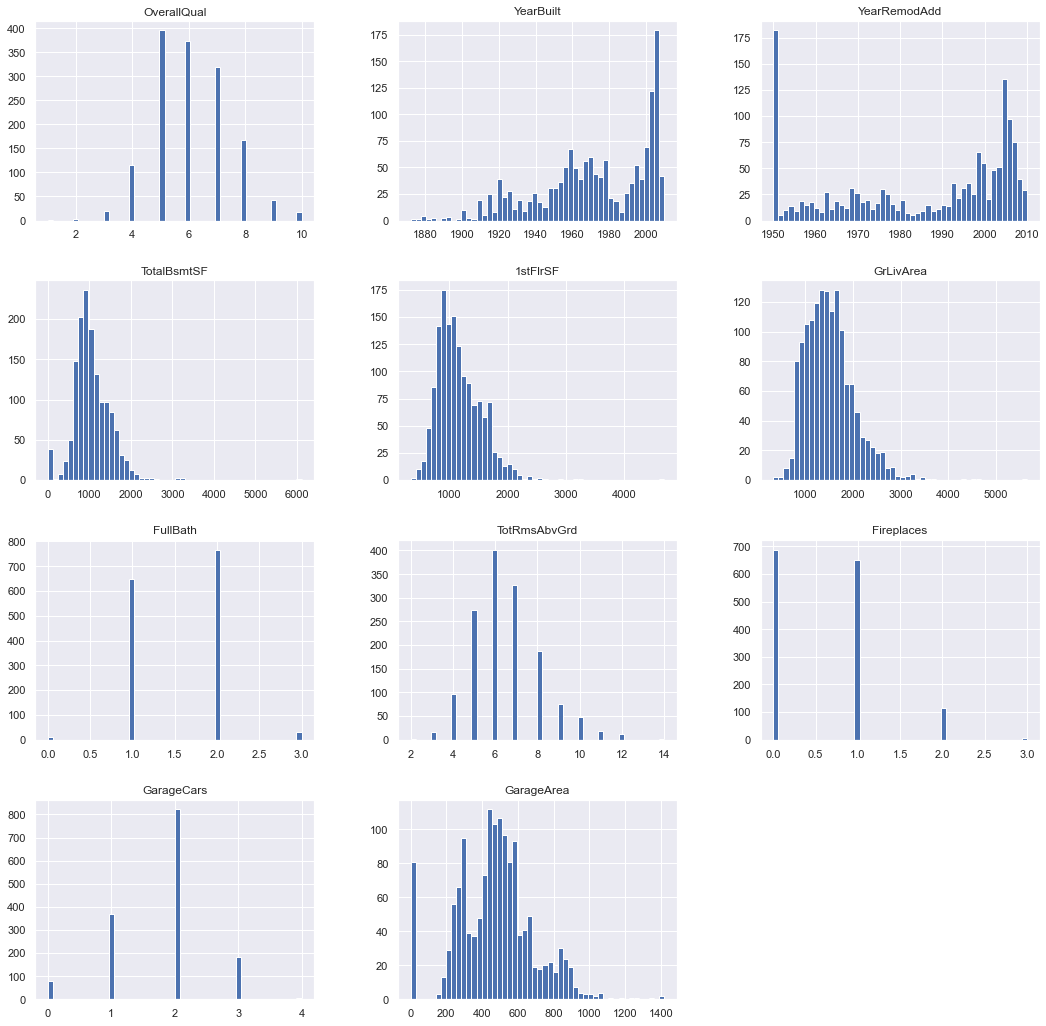

In [10]:
df_train[corr_cols].hist(bins=50, figsize=(18, 18))
plt.show()

- 전체 면적을 나타내는 TotalSF 생성 후 상관관계보기

In [11]:
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
corr_cols.append("TotalSF")

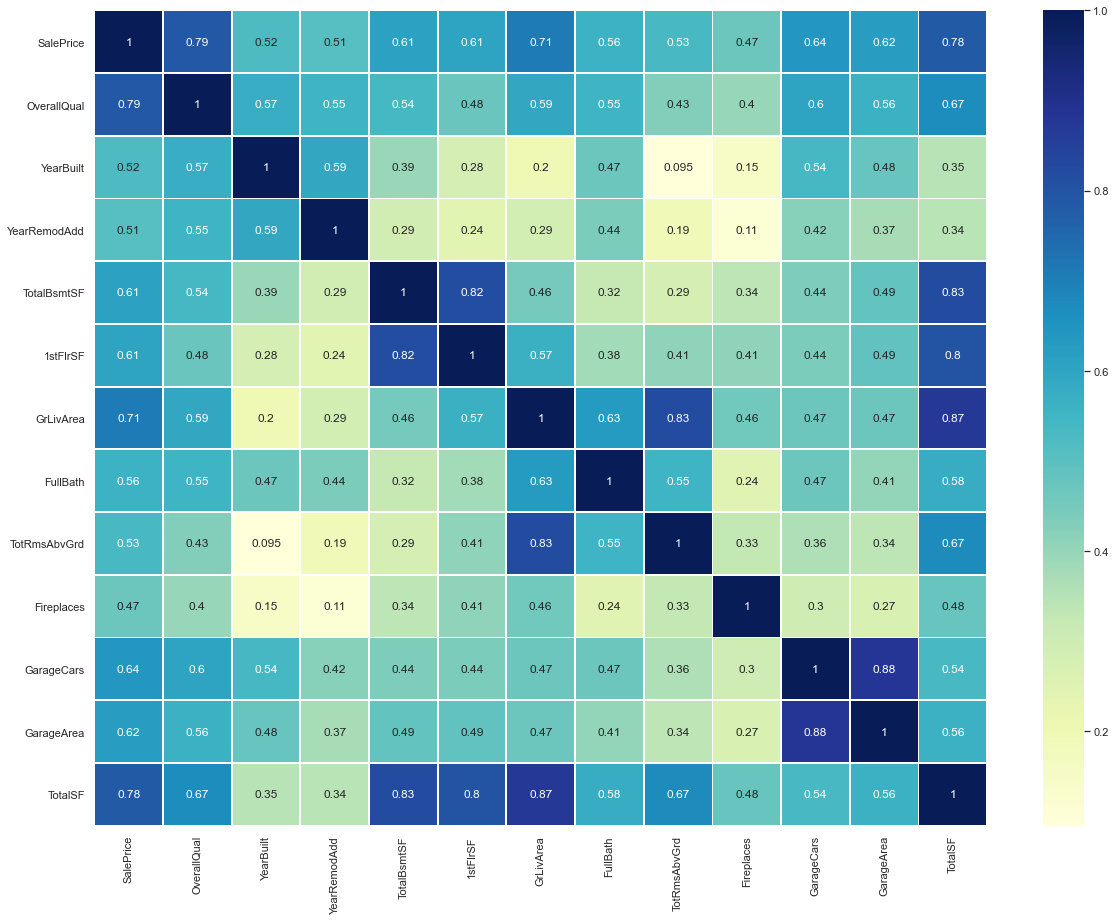

In [12]:
temp_df = pd.merge(df_train["SalePrice"], df_train[corr_cols], left_index=True, right_index=True)
corr = temp_df.corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

# Outliers

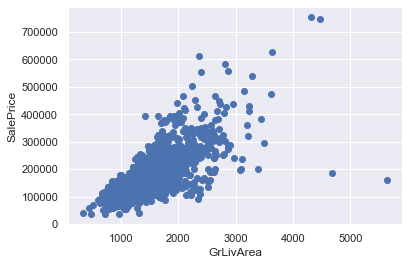

In [13]:
plt.scatter(df_train["GrLivArea"], df_train["SalePrice"])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

- 우측 하단에 outlier로 보이는 두 개의 데이터가 보인다. -> 삭제

In [14]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

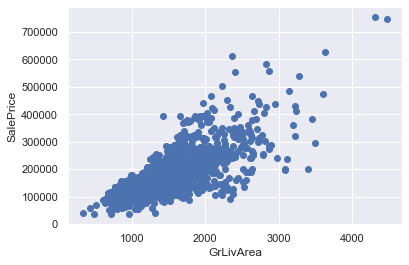

In [15]:
plt.scatter(df_train["GrLivArea"], df_train["SalePrice"])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

# object 데이터 (보류)

In [16]:
object_cols = list(df_train.dtypes[df_train.dtypes == object].index)

In [17]:
df_train[object_cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,CBlock,GasA,TA,Y,SBrkr,TA,Min1,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Stone,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,CBlock,GasA,Gd,Y,FuseA,Gd,Typ,Y,WD,Normal


<ipython-input-18-d99c541048a7>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots(figsize=(10,10))


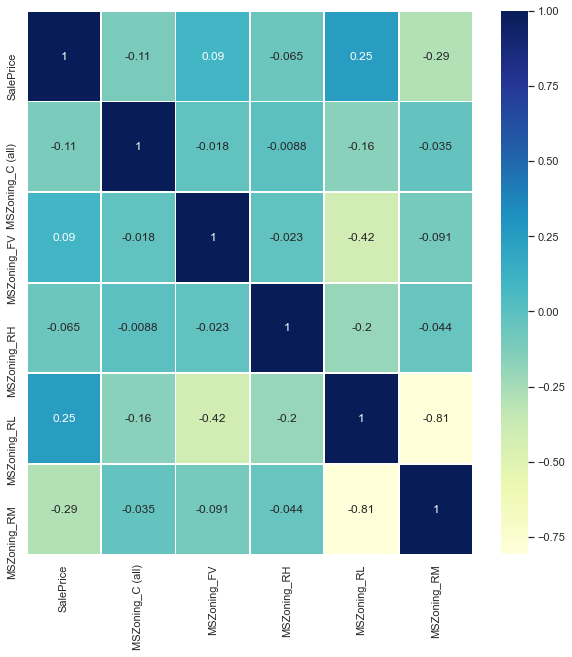

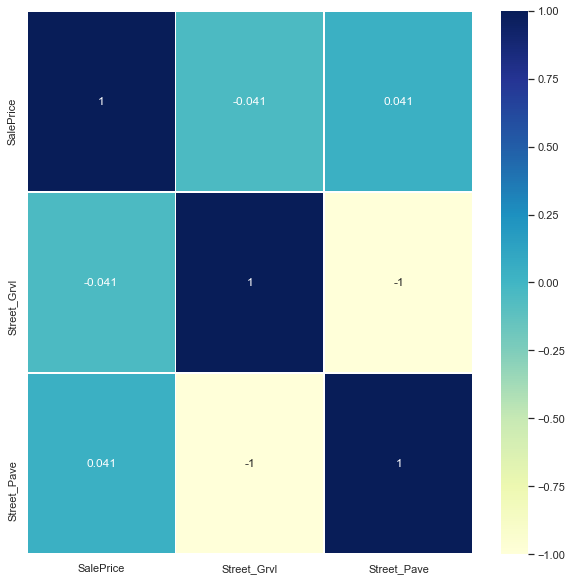

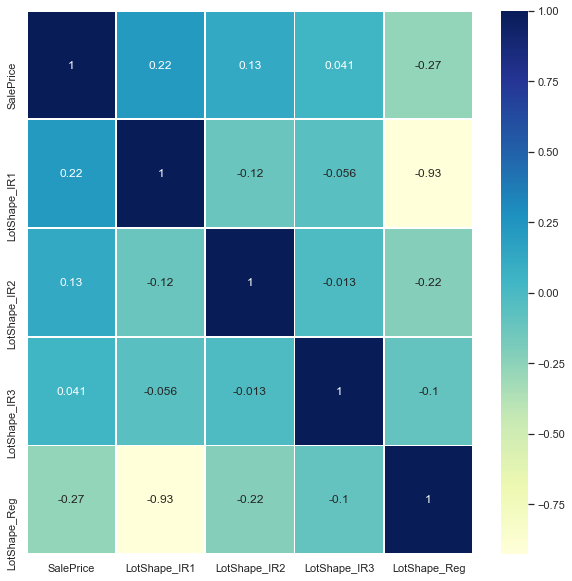

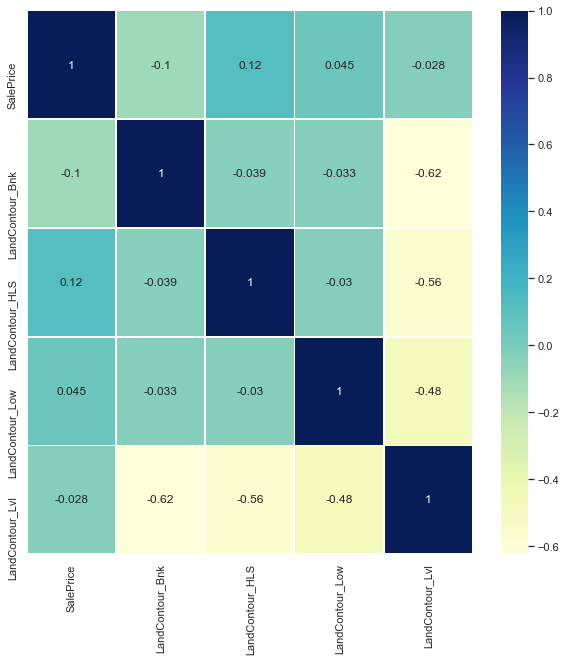

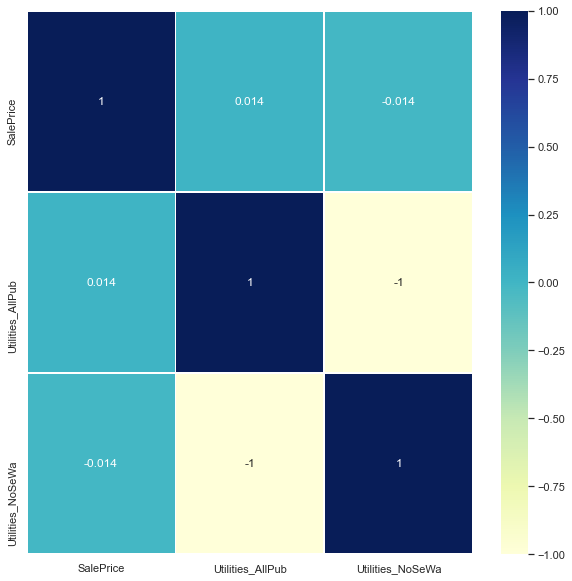

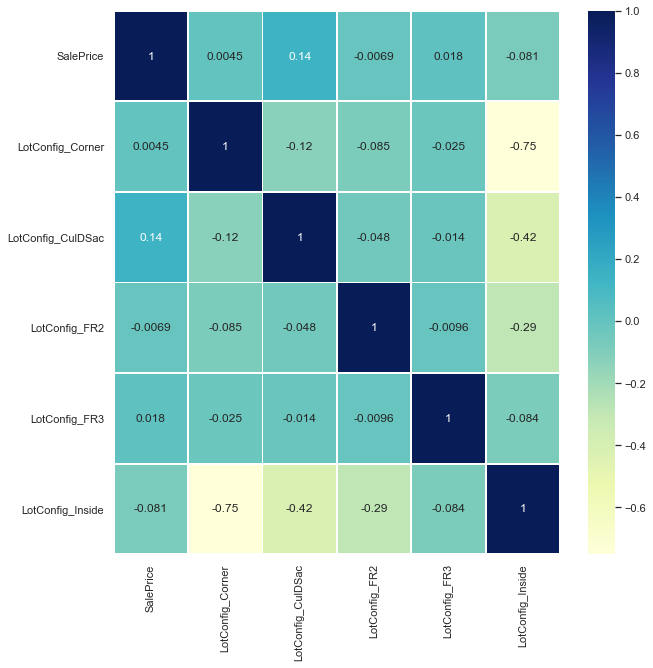

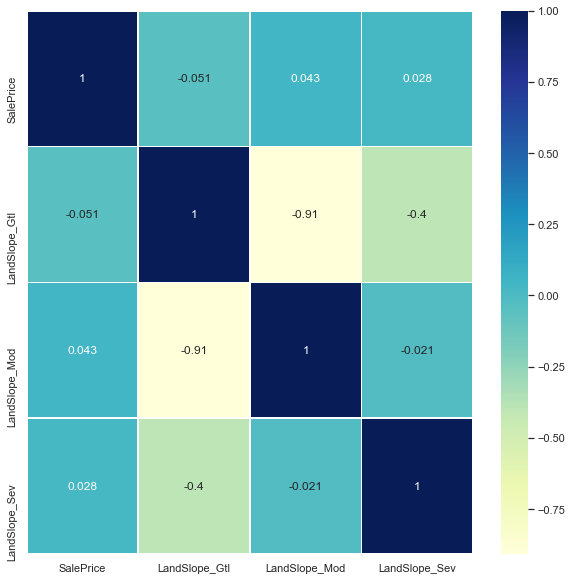

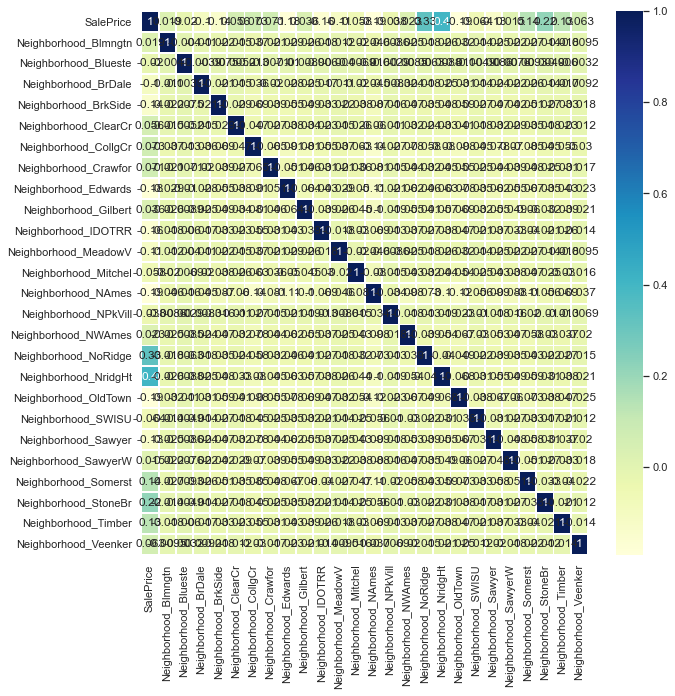

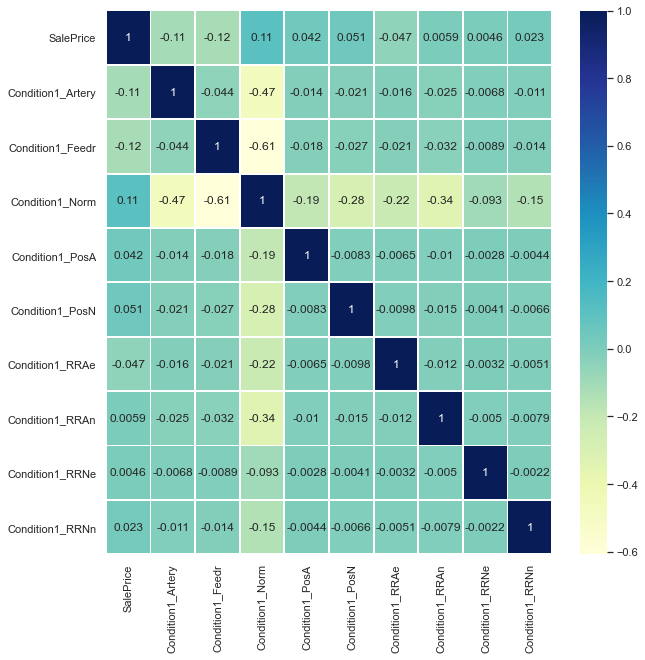

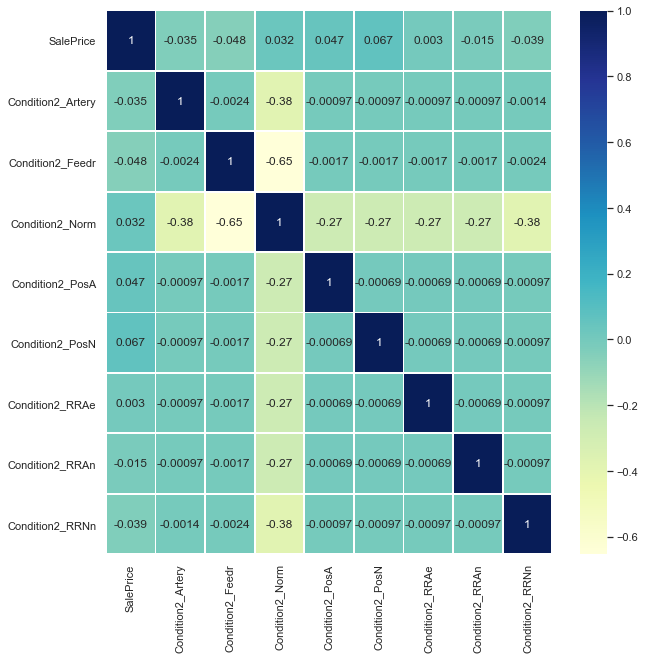

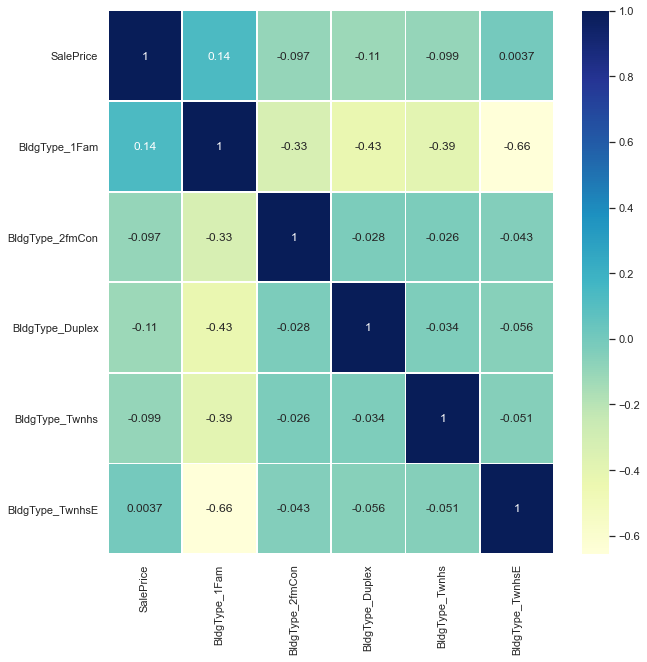

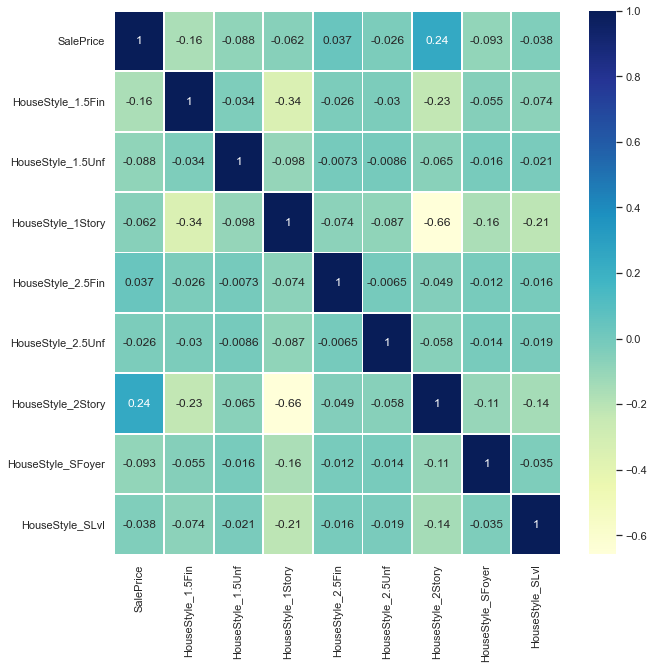

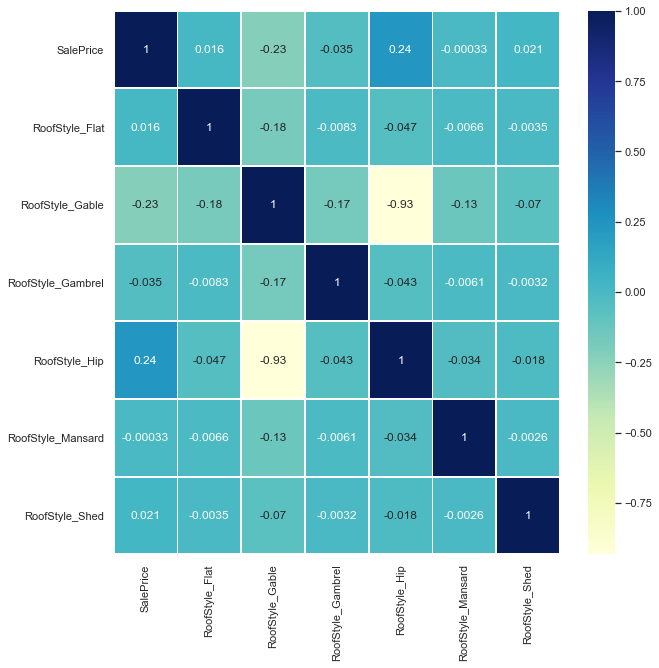

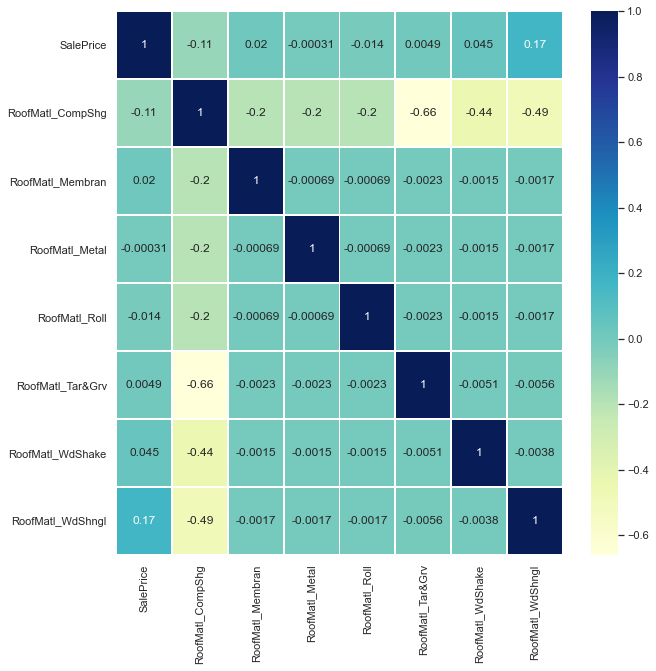

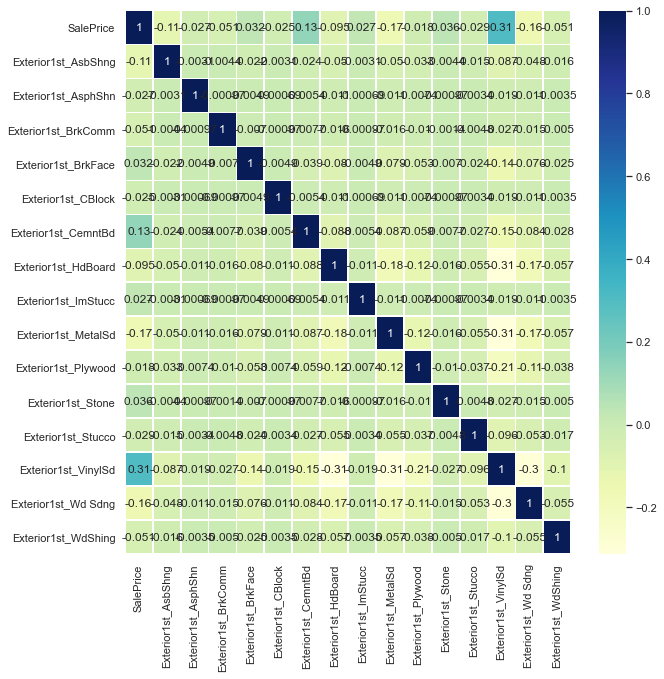

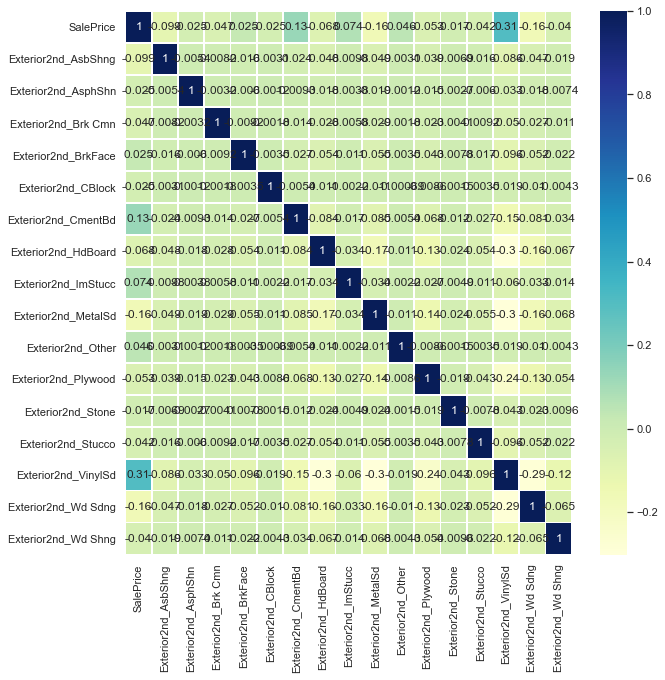

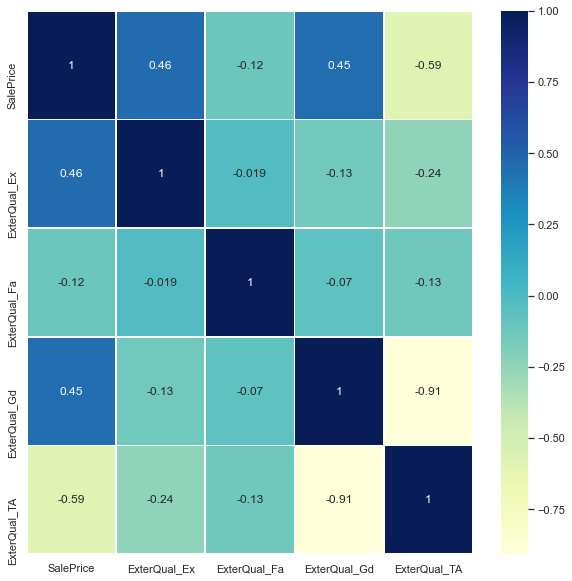

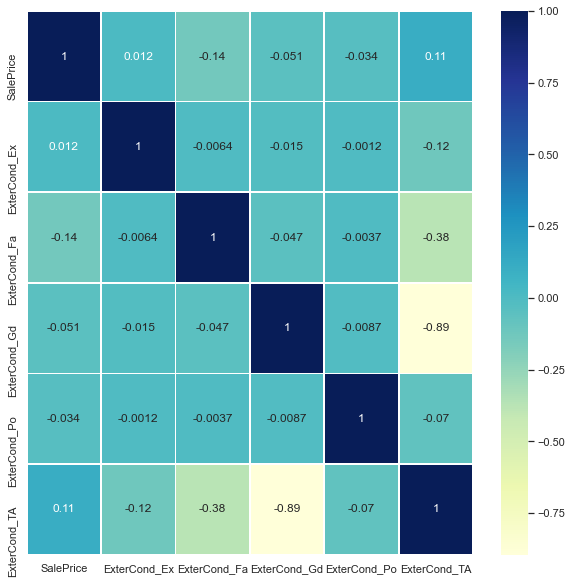

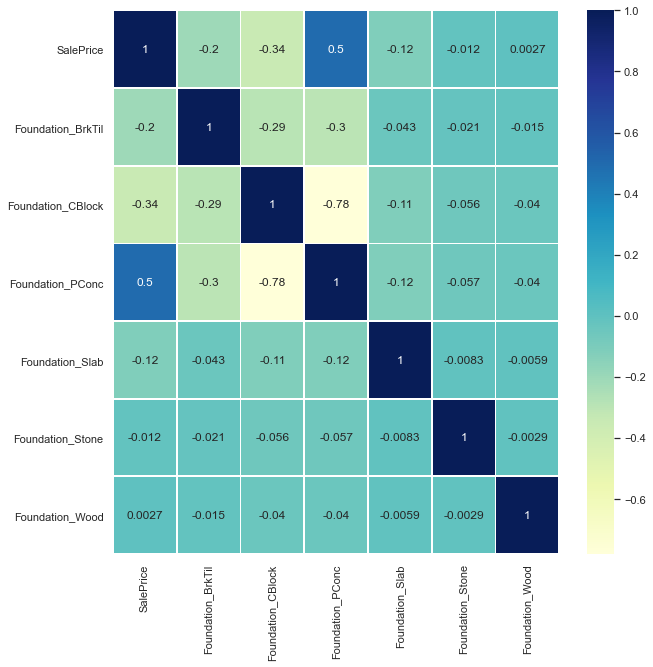

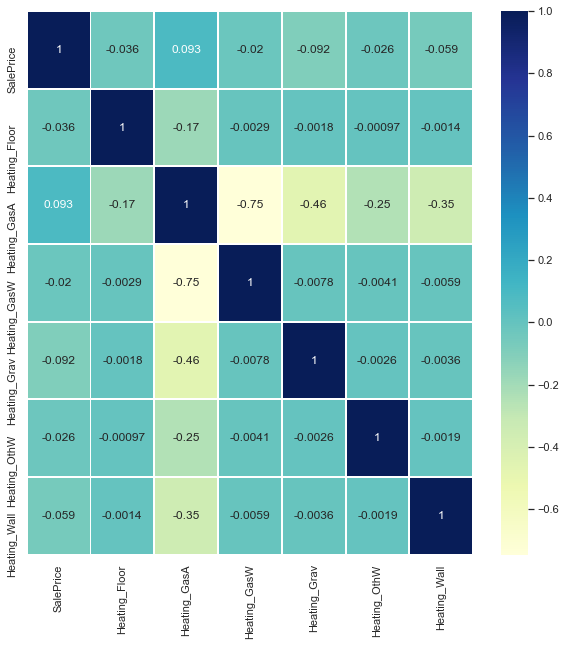

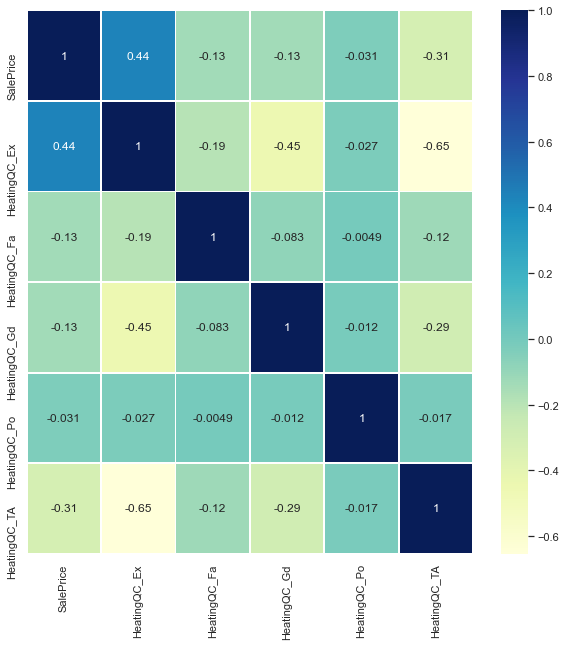

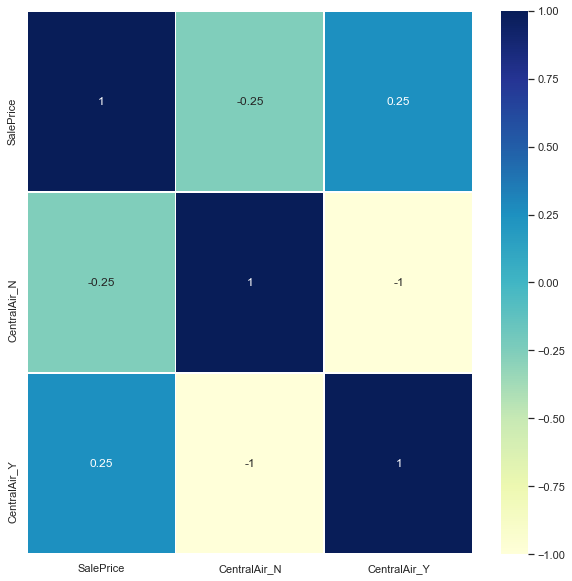

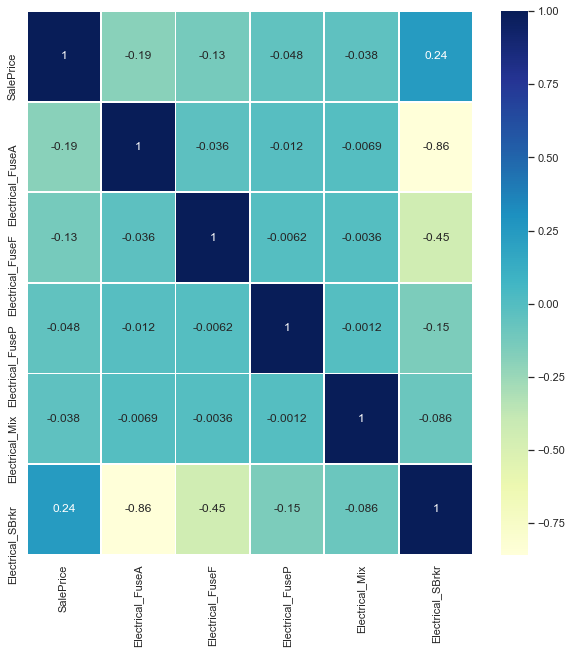

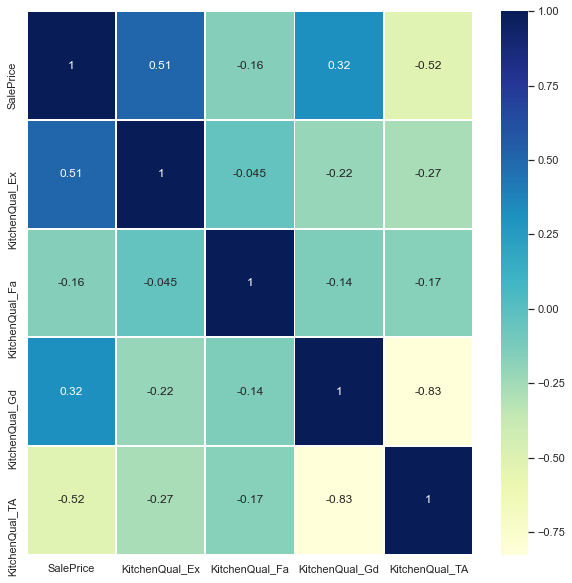

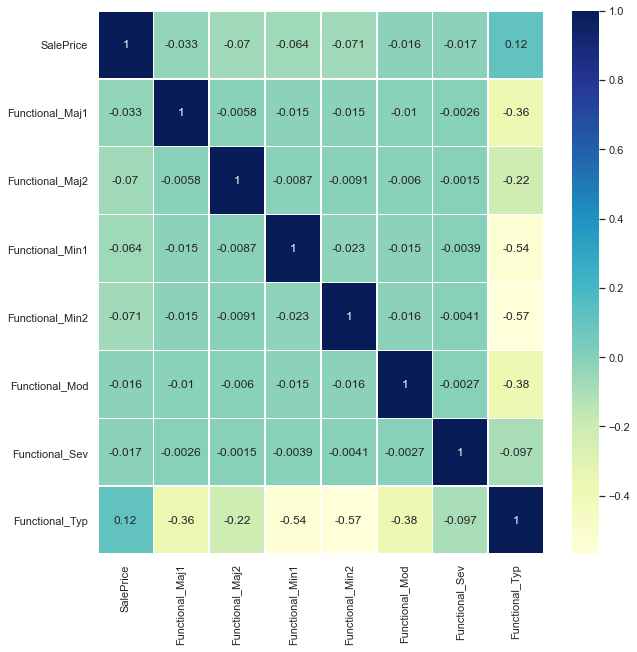

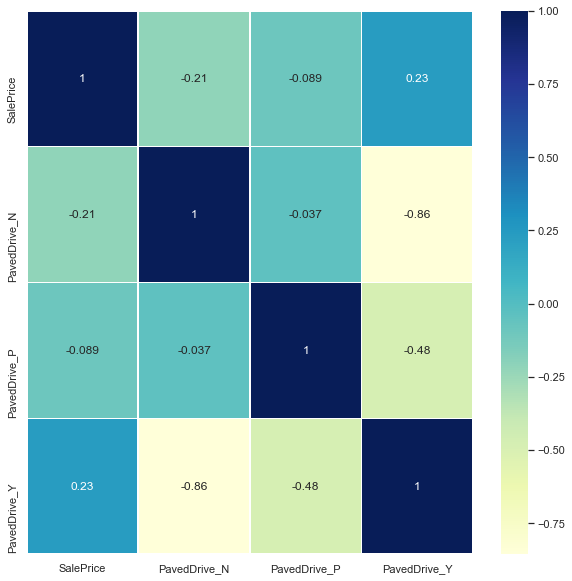

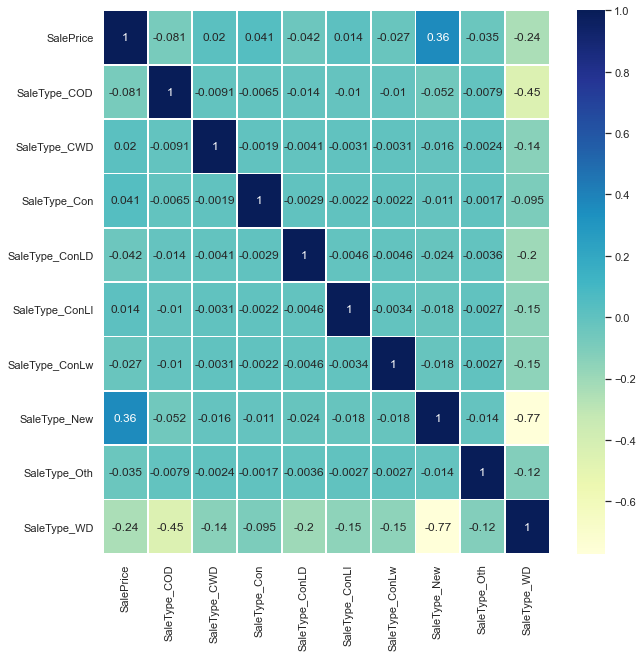

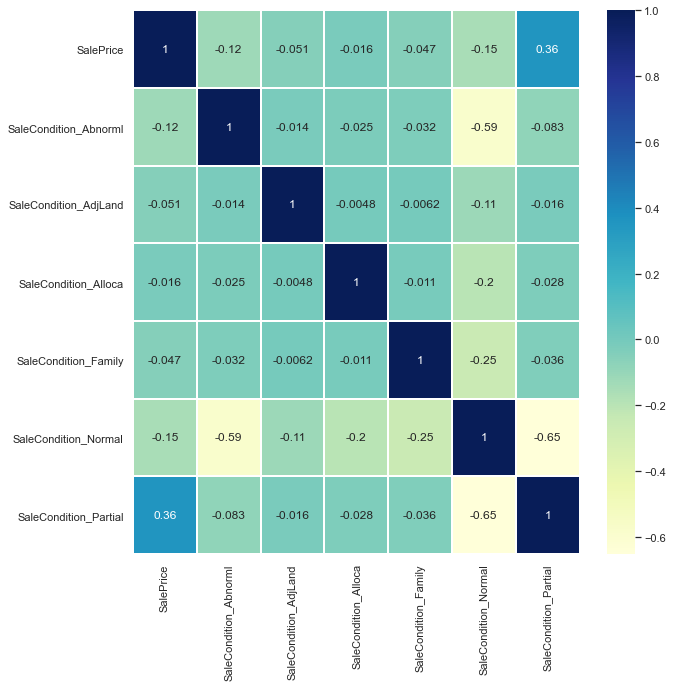

In [18]:
for col_name in object_cols:    
    temp_df = pd.merge(df_train["SalePrice"], pd.get_dummies(df_train[[col_name]]), left_index=True, right_index=True)
    corr = temp_df.corr()

    sns.set()
    plt.subplots(figsize=(10,10))
    ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

# training

In [19]:
y_train = df_train["SalePrice"]
df_train = df_train.drop("SalePrice", axis=1)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

house_num_tr = num_pipeline.fit_transform(df_train[corr_cols])

from sklearn.compose import ColumnTransformer

num_attribs = corr_cols
cat_attribs = object_cols

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

house_prepared = full_pipeline.fit_transform(df_train)

In [22]:
from sklearn.linear_model import LinearRegression

X_train = house_prepared
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [24]:
def display_scores(scores):
    print("평균 : ", scores.mean())

In [25]:
display_scores(lin_rmse_scores)

평균 :  28713.406958934782


In [26]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, penalty="l2", eta0=0.1)
sgd_reg.fit(X_train, y_train)

scores = cross_val_score(sgd_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
sgd_rmse_scores = np.sqrt(-scores)
display_scores(sgd_rmse_scores)

평균 :  29393.212026926834


In [27]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
scores = cross_val_score(ridge_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-scores)
display_scores(ridge_rmse_scores)

평균 :  28109.319536290586


In [28]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
scores = cross_val_score(lasso_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-scores)
display_scores(lasso_rmse_scores)

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296370603568.727, tolerance: 852331152.6842694
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329600771739.4575, tolerance: 827381606.9938477
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288355220666.0621, tolerance: 828980949.4954944
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\zxwlg\miniconda3\envs\d

평균 :  28630.71150033669


C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258894694749.30597, tolerance: 843812366.9849871
  model = cd_fast.sparse_enet_coordinate_descent(


In [36]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [37]:
scores = cross_val_score(ridge_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-scores)
display_scores(ridge_rmse_scores)

평균 :  28109.319536290586


# test data

In [29]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


In [30]:
df_test = df_test.drop((missing_data[missing_data['Total'] > 4]).index,1)
temp_cols = list(missing_data[missing_data['Total'] < 5][missing_data['Total'] > 0].index)
for col_name in temp_cols:
    df_test = df_test.drop(df_test.loc[df_test[col_name].isnull()].index)

df_test.isnull().sum().max()

<ipython-input-30-6e081c02930a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_cols = list(missing_data[missing_data['Total'] < 5][missing_data['Total'] > 0].index)


0

In [31]:
df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

In [32]:
test_prepared = full_pipeline.transform(df_test)

In [43]:
ridge_sub = ridge_reg.predict(test_prepared)

In [52]:
len(ridge_sub)

1447

In [53]:
submission=pd.read_csv('sample_submission.csv')

submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659
